In [13]:
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [3]:
columns = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
## df_hw will be used for homework
df_hw = df[columns]

In [5]:
df_hw.isnull().sum()
## Only total_bedrooms has missing values

## Fill the nan values
df_hw.fillna(0, inplace=True)

In [6]:
df_hw['rooms_per_household'] = df_hw['total_rooms']/df_hw['households']

df_hw['bedrooms_per_room'] = df_hw['total_bedrooms']/df['total_rooms']

df_hw['population_per_household'] = df_hw['population']/df_hw['households']

### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [7]:
df_hw.ocean_proximity.value_counts()
## Answer: <1H OCEAN

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

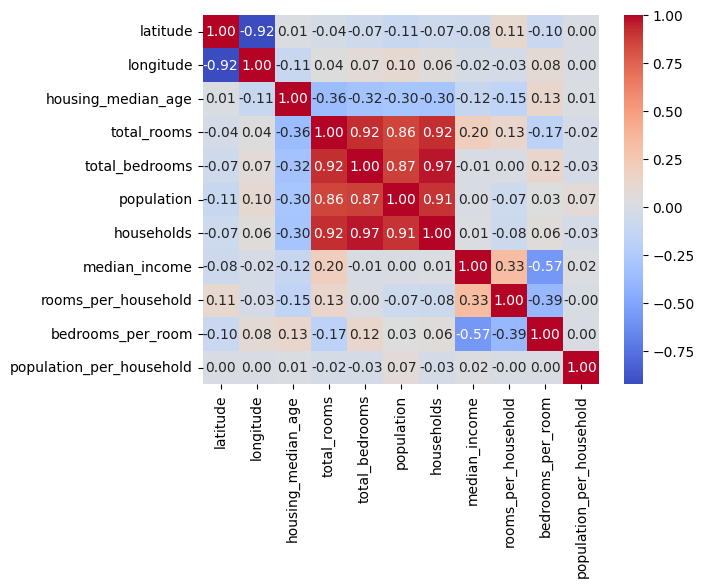

In [15]:
numerical= ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households', 'median_income','rooms_per_household',
'bedrooms_per_room', 'population_per_household']

## Sns heatmap for correlation
sns.heatmap(df_hw[numerical].corr(), annot=True, fmt='.2f', cmap='coolwarm');

## Total bedrooms and households have 0.97
## Total bedrooms and total_rooms have 0.92
## Pouplation and households have 0.91
## population_per_household and total_romms have -0.02

## Answer: total_bedrooms and households

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

In [22]:
df_hw['above_average']= df_hw['median_house_value'].apply(lambda x: 1 if x > df_hw['median_house_value'].mean() else 0)

In [23]:
df_hw.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


In [24]:
from sklearn.model_selection import train_test_split

del df_hw['median_house_value']



In [25]:
df_full_train, df_test = train_test_split(df_hw, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

#Len of each set
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [33]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16



In [28]:
categorical= list(df_full_train.dtypes[df_full_train.dtypes == 'object'].index)

In [29]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return round(mutual_info_score(series, df_train['above_average']),2)



In [30]:
mi = df_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

#Answer: 0.1

ocean_proximity    0.1
dtype: float64

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [32]:
#One hot encoding for categorical
from sklearn.feature_extraction import DictVectorizer


dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [34]:
#Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, random_state=42, max_iter = 1000)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
##Accuracy on the validation dataset
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

##Answer: 0.84

0.8362403100775194

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [45]:
def train_model_accuracy(df_train, df_valid, delete_this_column):
    df_train = df_train.copy()
    df_valid = df_valid.copy()
    
    df_train = df_train.drop(delete_this_column, axis=1)
    df_valid = df_valid.drop(delete_this_column, axis=1)
    
    y_train = df_train.above_average.values
    y_valid = df_valid.above_average.values
    
    del df_train['above_average']
    del df_valid['above_average']
    
    categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
    numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)
    ##Delete the column from numerical
    numerical = [x for x in numerical if x != delete_this_column]
    
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    valid_dict = df_valid[categorical + numerical].to_dict(orient='records')
    X_valid = dv.transform(valid_dict)
    
    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42, max_iter = 1000)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_valid)
    return accuracy_score(y_valid, y_pred)


In [47]:
##Without total_rooms
0.84-train_model_accuracy(df_train, df_val, 'total_rooms')


0.003517441860465098

In [48]:
## Without total_bedrooms
0.84-train_model_accuracy(df_train, df_val, 'total_bedrooms')

0.004728682170542564

In [49]:
## Without population
0.84-train_model_accuracy(df_train, df_val, 'population')

0.013691860465116279

In [50]:
## Without households
0.84-train_model_accuracy(df_train, df_val, 'households')

0.006666666666666599

In [51]:
## Answer: Without total_rooms


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [56]:
## Using the original dataset
df['rooms_per_household'] = df['total_rooms']/df['households']

df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']

df['population_per_household'] = df['population']/df['households']


df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

##Applying log transformation to the target variable
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

## Drop the target variable from the data
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [57]:
## One hot encoding for categorical
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [58]:
## Train a linear regression model with scikit-learn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
def linear_regression_scikit(a):
    model = Ridge(alpha = a, solver = 'sag', random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    #Calculate rmse 
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return round(rmse, 3)

In [61]:
alpha = [0 , 0.01, 0.1, 1, 10]

for a in alpha:
    print('RMSE','for alpha {}:'.format(a),linear_regression_scikit(a))

RMSE for alpha:0 0.524
RMSE for alpha:0.01 0.524
RMSE for alpha:0.1 0.524
RMSE for alpha:1 0.524
RMSE for alpha:10 0.524
